In [2]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.DataFrame(columns=['Deporte','pais','liga','equipo_A','equipo_B','resultado_A','resultado_B','momios_A','momios_B'])
driver = webdriver.Safari()
driver.maximize_window()
n_partidos_1=0
no_data_back_last_paises=[]
no_data_back_last_ligas=[]
dict_ndbl={}


# Pagina inicial
driver.get("https://s5.sir.sportradar.com/bet365/es")
time.sleep(3)

#selecciona el deporte
deporte=driver.find_element_by_xpath('//*[@id="sr-container"]/div/div/div[3]/div/div/div/div[1]/a/div/div[2]/h3').text
driver.find_element_by_xpath('//*[@id="sr-container"]/div/div/div[3]/div/div/div/div[1]/a').click()
time.sleep(3)

#selecciona el pais
n_paises=len(driver.find_elements_by_xpath('//*[@id="sr-container"]/div/div/div[3]/div/div/div/div/div/span/div/div/div/div/div[2]/a'))
h=0
#paises_elegidos=[i+24 for i in range(4)]
paises_elegidos=range(n_paises)
for n_pais in paises_elegidos:
    pais=driver.find_element_by_xpath('//*[@id="sr-container"]/div/div/div[3]/div/div/div/div/div/span/div/div/div/div/div[2]/a['+str(n_pais+1)+']/text()').text
    #print(pais)
    driver.find_element_by_xpath('//*[@id="sr-container"]/div/div/div[3]/div/div/div/div/div/span/div/div/div/div/div[2]/a['+str(n_pais+1)+']').click()
    time.sleep(2)
    n_liga=len(driver.find_elements_by_class_name('list-group-item'))
    for j in range(n_liga):
        
#selecciona la liga
        try:
            liga=driver.find_element_by_xpath('//*[@id="sr-container"]/div/div/div[3]/div/div/div/div/div/span/div/div/div/div/div/a['+str(j+1)+']/span').text
        except:
            time.sleep(2)
            liga=driver.find_element_by_xpath('//*[@id="sr-container"]/div/div/div[3]/div/div/div/div/div/span/div/div/div/div/div/a['+str(j+1)+']/span').text
        #print(liga)
        driver.find_element_by_xpath('//*[@id="sr-container"]/div/div/div[3]/div/div/div/div/div/span/div/div/div/div/div/a['+str(j+1)+']').click()
        time.sleep(3)
        current_url=driver.current_url
        
#selecciona el mostrar mas
        try:
            driver.find_element_by_xpath('//*[@id="sr-container"]/div/div/div[3]/div/div/div/div[4]/div[2]/div[2]/div/div/div/div/div/div[1]/table/tbody/tr')
        except:
            n_partidos=len(driver.find_elements_by_xpath('//*[@id="sr-container"]/div/div/div[4]/div/div/div/div[4]/div[2]/div[2]/div/div/div/div/div/div[1]/table/tbody/tr'))
            if n_partidos > 0:
                xpath_='//*[@id="sr-container"]/div/div/div[4]/div/div/div/div[4]/div[2]/div[2]/div/div/div/div/div/div[1]/table/tbody/tr'
            if n_partidos == 0:
                n_partidos_1= len(driver.find_elements_by_xpath('//*[@id="sr-container"]/div/div/div[4]/div/div/div/div[2]/div[2]/div[2]/div/div/div/div/div/div[1]/table/tbody/tr'))
            if n_partidos_1 > 0:
                xpath_='//*[@id="sr-container"]/div/div/div[4]/div/div/div/div[2]/div[2]/div[2]/div/div/div/div/div/div[1]/table/tbody/tr'
                n_partidos=n_partidos_1
            if n_partidos == 6:
                n_botones_mostrar_mas=driver.find_elements_by_xpath("//*[contains(text(), 'Mostrar más')]")
                for q in n_botones_mostrar_mas:
                    q.click()
                    time.sleep(1)
            n_partidos=len(driver.find_elements_by_xpath(xpath_))
            #print(n_partidos)
            for i in range(n_partidos):
                try:
                    driver.find_element_by_xpath(xpath_+'['+str(i+1)+']/td[3]/div/button').text
                except:
                    pass
                else:
                    equipo_A=driver.find_element_by_xpath(xpath_+'['+str(i+1)+']/td[2]/div[1]/div[1]/div/div[1]/div/div/div[1]').text
                    equipo_B=driver.find_element_by_xpath(xpath_+'['+str(i+1)+']/td[2]/div[1]/div[3]/div/div[2]/div/div/div[1]').text
                    resultado_A=driver.find_element_by_xpath(xpath_+'['+str(i+1)+']/td[2]/div[1]/div[2]/div[2]/div/div[1]').text
                    resultado_B=driver.find_element_by_xpath(xpath_+'['+str(i+1)+']/td[2]/div[1]/div[2]/div[2]/div/div[3]').text
                    momios_A=driver.find_element_by_xpath(xpath_+'['+str(i+1)+']/td[3]/div/button').text
                    momios_B=driver.find_element_by_xpath(xpath_+'['+str(i+1)+']/td[5]/div/button').text
                    df.loc[h]=[deporte,pais,liga,equipo_A,equipo_B,resultado_A,resultado_B,momios_A,momios_B]
                    h+=1
                if i == n_partidos-1:
                    print("normal back")
                    driver.back()         
        else:
            print("regular no data back")
            driver.back()
        finally:
            if current_url == driver.current_url:
                driver.back()
                print("no data back last")
                no_data_back_last_ligas.append(j)
    dict_ndbl[n_pais]=no_data_back_last_ligas
    no_data_back_last_ligas=[]

                
                
                
    print("back to country")
    driver.back()
    time.sleep(1)
df

normal back
no data back last
no data back last
normal back
back to country
no data back last
back to country
normal back
no data back last
normal back
normal back
no data back last
no data back last
no data back last
no data back last
no data back last
no data back last
no data back last
no data back last
no data back last
no data back last
normal back
no data back last
normal back
no data back last
back to country
normal back
no data back last
normal back
no data back last
back to country
no data back last
no data back last
no data back last
back to country
normal back
back to country
no data back last
back to country
normal back
back to country
no data back last
back to country
no data back last
back to country
normal back
back to country
normal back
normal back
no data back last
back to country
normal back
no data back last
back to country
no data back last
back to country
normal back
no data back last
back to country
no data back last
no data back last
no data back last
back to co

,Deporte,pais,liga,equipo_A,equipo_B,resultado_A,resultado_B,momios_A,momios_B
0,Baloncesto,Alemania,BBL,Bonn,Bayern Múnich,78,68,1.95,1.87
1,Baloncesto,Alemania,BBL,Hamburg Towers,Niners Chemnitz,81,104,1.87,1.95
2,Baloncesto,Alemania,BBL,Oldenburg,Rostock Seawolves,99,90,1.20,4.75
3,Baloncesto,Alemania,BBL,Bamberg,Mitteldeutscher,90,98,1.25,4.20
4,Baloncesto,Alemania,BBL,Heidelberg,Braunschweig,95,79,1.43,2.90
...,...,...,...,...,...,...,...,...,...
556,Baloncesto,Polonia,PLK,Zielona Gora,Sopot,83,99,2.00,1.71
557,Baloncesto,Polonia,PLK,Sopot,Ostrow Wielkopolski,93,78,1.87,1.80
558,Baloncesto,Polonia,PLK,Sokol Lancut,Bydgoszcz,84,72,2.00,1.71
559,Baloncesto,Polonia,PLK,Dabrowa Gornicza,Warszawa,93,76,2.65,1.43


In [3]:
driver = webdriver.Safari()
driver.maximize_window()
n_partidos_1=0


# Pagina inicial
driver.get("https://s5.sir.sportradar.com/bet365/es")
time.sleep(3)

#selecciona el deporte
deporte=driver.find_element_by_xpath('//*[@id="sr-container"]/div/div/div[3]/div/div/div/div[1]/a/div/div[2]/h3').text
driver.find_element_by_xpath('//*[@id="sr-container"]/div/div/div[3]/div/div/div/div[1]/a').click()
time.sleep(3)

#selecciona el pais
n_paises=len(driver.find_elements_by_xpath('//*[@id="sr-container"]/div/div/div[3]/div/div/div/div/div/span/div/div/div/div/div[2]/a'))
#paises_elegidos=[i+24 for i in range(4)]
paises_elegidos=range(n_paises)
for n_pais in paises_elegidos:
    pais=driver.find_element_by_xpath('//*[@id="sr-container"]/div/div/div[3]/div/div/div/div/div/span/div/div/div/div/div[2]/a['+str(n_pais+1)+']/text()').text
    print(pais)
    driver.find_element_by_xpath('//*[@id="sr-container"]/div/div/div[3]/div/div/div/div/div/span/div/div/div/div/div[2]/a['+str(n_pais+1)+']').click()
    time.sleep(2)
    n_liga=len(driver.find_elements_by_class_name('list-group-item'))
    for j in dict_ndbl[n_pais]:
        
#selecciona la liga
        try:
            liga=driver.find_element_by_xpath('//*[@id="sr-container"]/div/div/div[3]/div/div/div/div/div/span/div/div/div/div/div/a['+str(j+1)+']/span').text
        except:
            time.sleep(2)
            liga=driver.find_element_by_xpath('//*[@id="sr-container"]/div/div/div[3]/div/div/div/div/div/span/div/div/div/div/div/a['+str(j+1)+']/span').text
        print(liga)
        driver.find_element_by_xpath('//*[@id="sr-container"]/div/div/div[3]/div/div/div/div/div/span/div/div/div/div/div/a['+str(j+1)+']').click()
        time.sleep(3)
        current_url=driver.current_url
        
#selecciona el mostrar mas
        try:
            driver.find_element_by_xpath('//*[@id="sr-container"]/div/div/div[3]/div/div/div/div[4]/div[2]/div[2]/div/div/div/div/div/div[1]/table/tbody/tr')
        except:
            n_partidos=len(driver.find_elements_by_xpath('//*[@id="sr-container"]/div/div/div[4]/div/div/div/div[4]/div[2]/div[2]/div/div/div/div/div/div[1]/table/tbody/tr'))
            if n_partidos > 0:
                xpath_='//*[@id="sr-container"]/div/div/div[4]/div/div/div/div[4]/div[2]/div[2]/div/div/div/div/div/div[1]/table/tbody/tr'
            if n_partidos == 0:
                n_partidos_1= len(driver.find_elements_by_xpath('//*[@id="sr-container"]/div/div/div[4]/div/div/div/div[2]/div[2]/div[2]/div/div/div/div/div/div[1]/table/tbody/tr'))
            if n_partidos_1 > 0:
                xpath_='//*[@id="sr-container"]/div/div/div[4]/div/div/div/div[2]/div[2]/div[2]/div/div/div/div/div/div[1]/table/tbody/tr'
                n_partidos=n_partidos_1
            if n_partidos == 6:
                n_botones_mostrar_mas=driver.find_elements_by_xpath("//*[contains(text(), 'Mostrar más')]")
                for q in n_botones_mostrar_mas:
                    q.click()
                    time.sleep(1)
            n_partidos=len(driver.find_elements_by_xpath(xpath_))
            print(n_partidos)
            for i in range(n_partidos):
                try:
                    driver.find_element_by_xpath(xpath_+'['+str(i+1)+']/td[3]/div/button').text
                except:
                    pass
                else:
                    equipo_A=driver.find_element_by_xpath(xpath_+'['+str(i+1)+']/td[2]/div[1]/div[1]/div/div[1]/div/div/div[1]').text
                    equipo_B=driver.find_element_by_xpath(xpath_+'['+str(i+1)+']/td[2]/div[1]/div[3]/div/div[2]/div/div/div[1]').text
                    resultado_A=driver.find_element_by_xpath(xpath_+'['+str(i+1)+']/td[2]/div[1]/div[2]/div[2]/div/div[1]').text
                    resultado_B=driver.find_element_by_xpath(xpath_+'['+str(i+1)+']/td[2]/div[1]/div[2]/div[2]/div/div[3]').text
                    momios_A=driver.find_element_by_xpath(xpath_+'['+str(i+1)+']/td[3]/div/button').text
                    momios_B=driver.find_element_by_xpath(xpath_+'['+str(i+1)+']/td[5]/div/button').text
                    df.loc[h]=[deporte,pais,liga,equipo_A,equipo_B,resultado_A,resultado_B,momios_A,momios_B]
                    h+=1
                if i == n_partidos-1:
                    print("normal back")
                    driver.back()         
        else:
            print("regular no data back")
            driver.back()
        finally:
            if current_url == driver.current_url:
                driver.back()
                print("no data back last")
                no_data_back_last_ligas.append(j)
    dict_ndbl[n_pais]=no_data_back_last_ligas
    no_data_back_last_ligas=[]

                
                
                
    print("back to country")
    driver.back()
    time.sleep(1)
df

Alemania
1ª DBBL
0
no data back last
Pro A
0
no data back last
back to country
Argentina
LNB
0
no data back last
back to country
Australia
WNBL
0
no data back last
NBL1
0
no data back last
NBL1, Femenino
0
no data back last
NBL1, Central
0
no data back last
NBL1, Este
0
no data back last
NBL1, Femenino, Central
0
no data back last
NBL1, Femenino, Oeste
0
no data back last
NBL1, Sur
0
no data back last
NBL1, North
0
no data back last
NBL1 North, Women
0
no data back last
NBL1 South, Women
0
no data back last
NBL1, East
0
no data back last
NBL1 East, Women
0
no data back last
back to country
Austria
Superliga, Femenina
0
no data back last
Supercopa
0
no data back last
back to country
Bélgica
Liga Belga BNXT
0
no data back last
Top Division 1
0
no data back last
Copa de Bélgica
0
no data back last
back to country
Bolivia
back to country
Bosnia y Herzegovina
1ª División
0
no data back last
back to country
Brasil
back to country
Bulgaria
NBL
0
no data back last
back to country
Canadá
NBL
0


,Deporte,pais,liga,equipo_A,equipo_B,resultado_A,resultado_B,momios_A,momios_B
0,Baloncesto,Alemania,BBL,Bonn,Bayern Múnich,78,68,1.95,1.87
1,Baloncesto,Alemania,BBL,Hamburg Towers,Niners Chemnitz,81,104,1.87,1.95
2,Baloncesto,Alemania,BBL,Oldenburg,Rostock Seawolves,99,90,1.20,4.75
3,Baloncesto,Alemania,BBL,Bamberg,Mitteldeutscher,90,98,1.25,4.20
4,Baloncesto,Alemania,BBL,Heidelberg,Braunschweig,95,79,1.43,2.90
...,...,...,...,...,...,...,...,...,...
631,Baloncesto,Italia,Serie A,Sassari,B. Scafati,86,76,1.26,4.10
632,Baloncesto,Italia,Serie A,Brindisi,Victoria Libertas,74,102,1.50,2.70
633,Baloncesto,Italia,Serie A,Milan,Trieste,98,81,1.06,10.50
634,Baloncesto,Italia,Serie A,Pall. Brescia,Derthona Basket,83,68,1.50,2.70


In [4]:
df

,Deporte,pais,liga,equipo_A,equipo_B,resultado_A,resultado_B,momios_A,momios_B
0,Baloncesto,Alemania,BBL,Bonn,Bayern Múnich,78,68,1.95,1.87
1,Baloncesto,Alemania,BBL,Hamburg Towers,Niners Chemnitz,81,104,1.87,1.95
2,Baloncesto,Alemania,BBL,Oldenburg,Rostock Seawolves,99,90,1.20,4.75
3,Baloncesto,Alemania,BBL,Bamberg,Mitteldeutscher,90,98,1.25,4.20
4,Baloncesto,Alemania,BBL,Heidelberg,Braunschweig,95,79,1.43,2.90
...,...,...,...,...,...,...,...,...,...
631,Baloncesto,Italia,Serie A,Sassari,B. Scafati,86,76,1.26,4.10
632,Baloncesto,Italia,Serie A,Brindisi,Victoria Libertas,74,102,1.50,2.70
633,Baloncesto,Italia,Serie A,Milan,Trieste,98,81,1.06,10.50
634,Baloncesto,Italia,Serie A,Pall. Brescia,Derthona Basket,83,68,1.50,2.70


In [8]:
resA=list(df["resultado_A"])
resB=list(df["resultado_B"])
gano_A=[]
for a in range(len(resA)):
    if resA[a] > resB[a]:
        gano_A.append(1)
    else:
        gano_A.append(0)

In [9]:
df['gano_A?']=gano_A

In [10]:
df_por_si_acaso=df

In [11]:
df['momios_A']=df['momios_A'].astype(float)
df['momios_B']=df['momios_B'].astype(float)

In [12]:
momA=list(df['momios_A'])
momB=list(df['momios_B'])
confianza=[]
for c in range(len(resA)):
    if momA[c] < momB[c] and gano_A[c]==1:
        confianza.append(1)
    elif momA[c] > momB[c] and gano_A[c]==0:
        confianza.append(1)
    else:
        confianza.append(0)
        

In [13]:
df['confianza']=confianza

In [14]:
df

,Deporte,pais,liga,equipo_A,equipo_B,resultado_A,resultado_B,momios_A,momios_B,gano_A?,confianza
0,Baloncesto,Alemania,BBL,Bonn,Bayern Múnich,78,68,1.95,1.87,1,0
1,Baloncesto,Alemania,BBL,Hamburg Towers,Niners Chemnitz,81,104,1.87,1.95,0,0
2,Baloncesto,Alemania,BBL,Oldenburg,Rostock Seawolves,99,90,1.20,4.75,1,1
3,Baloncesto,Alemania,BBL,Bamberg,Mitteldeutscher,90,98,1.25,4.20,0,0
4,Baloncesto,Alemania,BBL,Heidelberg,Braunschweig,95,79,1.43,2.90,1,1
...,...,...,...,...,...,...,...,...,...,...,...
631,Baloncesto,Italia,Serie A,Sassari,B. Scafati,86,76,1.26,4.10,1,1
632,Baloncesto,Italia,Serie A,Brindisi,Victoria Libertas,74,102,1.50,2.70,0,0
633,Baloncesto,Italia,Serie A,Milan,Trieste,98,81,1.06,10.50,1,1
634,Baloncesto,Italia,Serie A,Pall. Brescia,Derthona Basket,83,68,1.50,2.70,1,1


In [52]:
df.to_csv(r'/Users/fernandosangerman/Documents/Bet365/Basketball',index=False)

In [15]:
df=pd.read_csv('/Users/fernandosangerman/Documents/Bet365/Basketball')

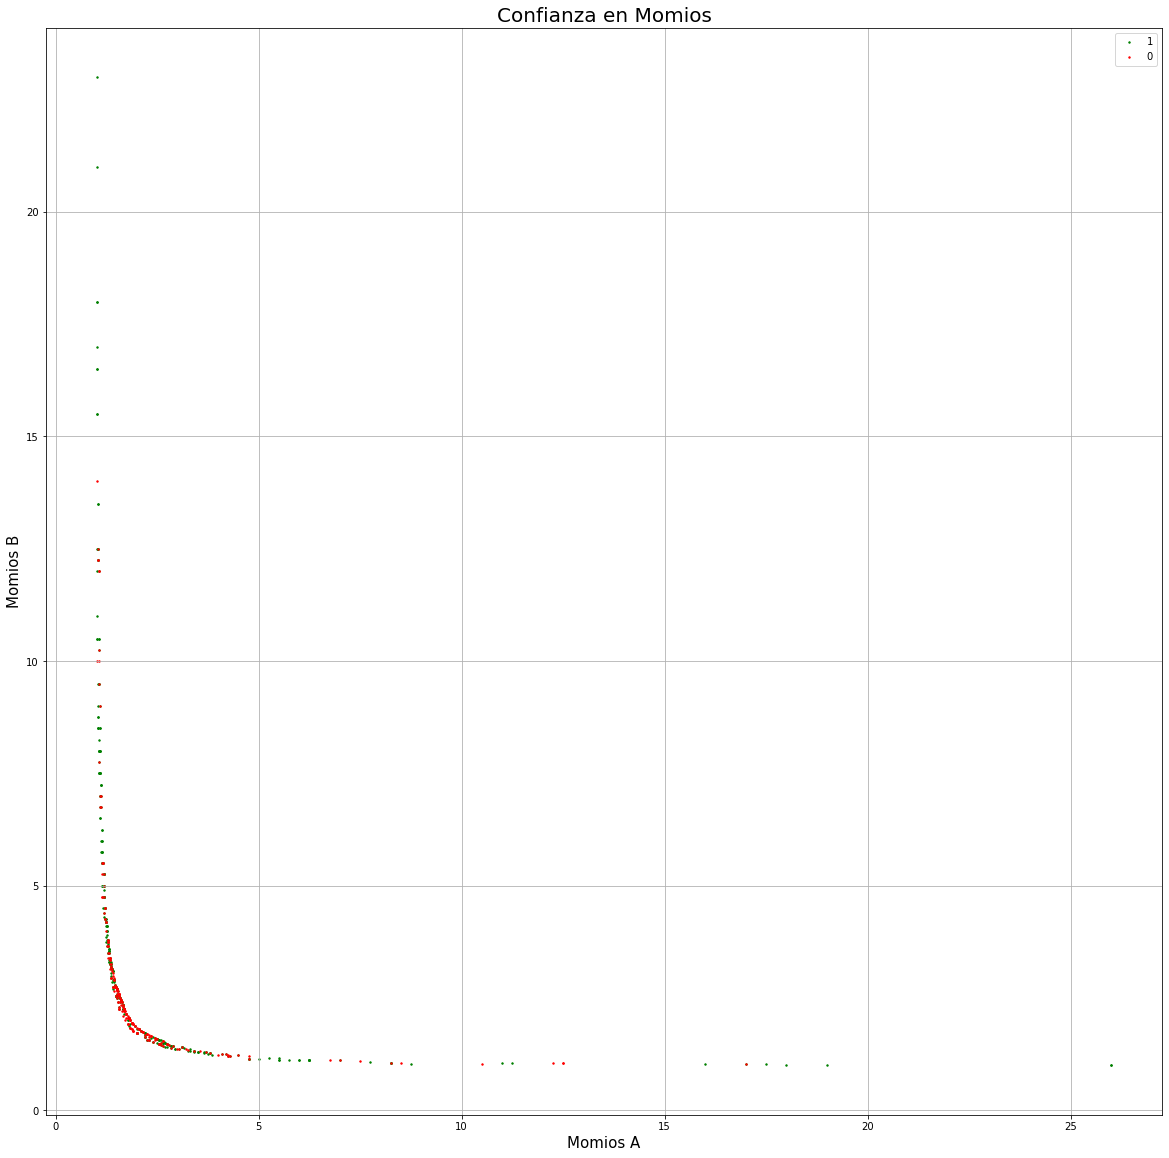

In [16]:
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Momios A', fontsize = 15)
ax.set_ylabel('Momios B', fontsize = 15)
ax.set_title('Confianza en Momios', fontsize = 20)
targets = [1, 0]
colors = ['g', 'r']
for result, color in zip(targets,colors):
    indicesToKeep = df['confianza'] == result
    ax.scatter(df.loc[indicesToKeep, 'momios_A']
               , df.loc[indicesToKeep, 'momios_B']
               , c = color
               , s = 2)
ax.legend(targets)
ax.grid()

In [17]:
sum(confianza)/len(confianza)

0.6823899371069182

In [18]:
df.loc[df.momios_A>12]

,Deporte,pais,liga,equipo_A,equipo_B,resultado_A,resultado_B,momios_A,momios_B,gano_A?,confianza
105,Baloncesto,China,CBA,Ningbo Rockets,Jiangsu Dragons,87,103,12.25,1.05,1,0
112,Baloncesto,China,CBA,Nanjing,Liaoning,100,112,17.00,1.02,0,1
118,Baloncesto,China,CBA,Fujian,Shandong,70,102,17.00,1.02,1,0
404,Baloncesto,Internacional,"World Cup Women, Qualification",Mali,China,64,84,18.00,1.00,0,1
563,Baloncesto,Grecia,A1,PAOK,Olympiakos Piraeus,68,88,16.00,1.03,0,1
573,Baloncesto,Grecia,A1,Promitheas Patras,Olympiakos Piraeus,72,100,12.50,1.05,1,0
578,Baloncesto,Grecia,A1,AS Karditsas,Panathinaikos,82,99,17.50,1.02,0,1
594,Baloncesto,Internacional,Campeonato Americano,Virgin Islands,Puerto Rico,73,76,19.00,1.01,0,1
601,Baloncesto,Internacional,Campeonato Americano,Panama,México,60,65,26.00,1.00,0,1
604,Baloncesto,Internacional,Campeonato Americano,Virgin Islands,Argentina,62,95,26.00,1.00,0,1


In [46]:
conf_pais=[]
count_pais=[]
for pais_c in df['pais'].unique():
    count_pais.append(df.loc[df.pais==pais_c]['confianza'].count())
    conf_pais.append((df.loc[df.pais==pais_c]['confianza'].sum())/(df.loc[df.pais==pais_c]['confianza'].count()))
dict_conf_pais={'Pais':df['pais'].unique(),'Confianza':conf_pais,'N':count_pais}
df_conf_pais=pd.DataFrame(dict_conf_pais)
df_conf_pais.sort_values(by=['Confianza'],ascending=False)

,Pais,Confianza,N
14,Grecia,0.846154,26
12,Japón,0.733333,30
4,China Taipéi,0.730769,26
7,Estados Unidos,0.721311,122
0,Alemania,0.657895,38
8,Francia,0.633333,30
9,Internacional,0.621849,119
3,China,0.620690,29
11,Italia,0.620690,29
2,Brasil,0.600000,30


In [44]:
conf_liga=[]
count_liga=[]
for liga_c in df['liga'].unique():
    count_liga.append(df.loc[df.liga==liga_c]['confianza'].count())
    conf_liga.append((df.loc[df.liga==liga_c]['confianza'].sum())/(df.loc[df.liga==liga_c]['confianza'].count()))
dict_conf_liga={'Liga':df['liga'].unique(),'Confianza':conf_liga,'N':count_liga}
df_conf_liga=pd.DataFrame(dict_conf_liga)
df_conf_liga.sort_values(by=['Confianza'],ascending=False)

,Liga,Confianza,N
22,BNXT Super Cup,1.000000,1
11,NBA Partido All Star,1.000000,1
24,Copa de Liga,0.875000,8
13,"NCAA Division I National Championship, Femenina",0.866667,30
28,A1,0.846154,26
12,NCAA,0.764706,17
1,Copa BBL,0.750000,12
16,The Basketball Classic,0.750000,16
29,Campeonato Americano,0.739130,23
26,B.Liga,0.733333,30
